In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import torchvision
from torchvision import transforms
from torchvision.io import read_image
from pathlib import Path
import torchvision.models as models
import torchvision.datasets as datasets
import matplotlib.pyplot as plt
import pickle as pk

In [2]:
df = pd.read_csv('metrics.csv')
df

,run_id,key,value,step,timestamp
0,3be2c027415441698c0337648d726f3a,acc_top1,25.000,0,1698470335833
1,3be2c027415441698c0337648d726f3a,acc_top1,18.750,1,1698470345993
2,3be2c027415441698c0337648d726f3a,acc_top1,21.875,2,1698470357032
3,3be2c027415441698c0337648d726f3a,acc_top1,25.000,3,1698470370478
4,3be2c027415441698c0337648d726f3a,acc_top1,21.875,4,1698470381232
...,...,...,...,...,...
2998,3be2c027415441698c0337648d726f3a,acc_top1_val,43.750,996,1698486384050
2999,3be2c027415441698c0337648d726f3a,acc_top1_val,59.375,997,1698486402802
3000,3be2c027415441698c0337648d726f3a,acc_top1_val,50.000,998,1698486417358
3001,3be2c027415441698c0337648d726f3a,acc_top1_val,46.875,999,1698486433497


In [3]:
test = (df[df['key'] == 'acc_top1'])['value']
train = (df[df['key'] == 'acc_top1_train'])['value']

In [4]:
test

0       25.000
1       18.750
2       21.875
3       25.000
4       21.875
         ...  
996     56.250
997     59.375
998     46.875
999     53.125
1000    53.125
Name: value, Length: 1001, dtype: float64

In [5]:
len(test)

1001

In [6]:
epochs = [i for i in range(len(test))]

In [7]:
import numpy as np

In [8]:
np.argmax(test)

673

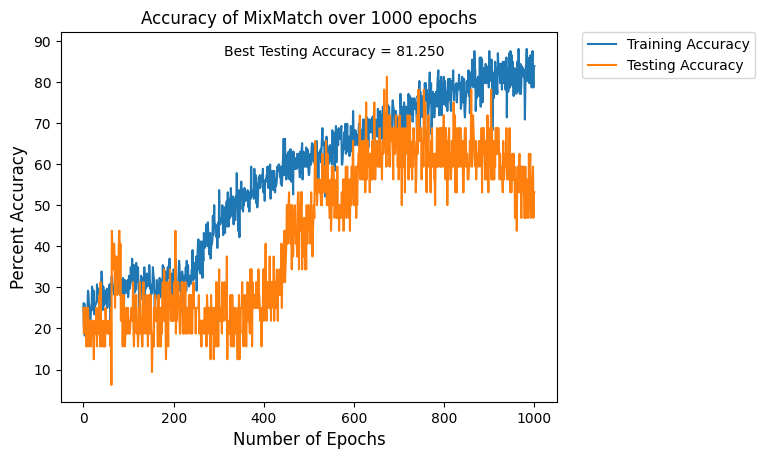

In [10]:
plot_param = "Accuracy"
# plot_param = "Loss"
model_type = "MixMatch"

# with open(fname, 'rb') as f: 
#     output = pk.load(f)

# hyperparams = f"(batch_size={batch_size}, learning_rate={lr}, momentum={momentum})"

plt.figure()

plt.title(f"Accuracy of {model_type} over {len(epochs)-1} epochs")
plt.plot(epochs, train, label = "Training Accuracy")
plt.plot(epochs, test, label = "Testing Accuracy")

# plt.title(f"Loss of {model_type} over {len(epochs)} epochs\n\n" + hyperparams)
# plt.plot(epochs, train, label = "Training Loss")
# plt.plot(epochs, test, label = "Testing Loss")

plt.ylabel("Percent Accuracy", size=12)
plt.xlabel("Number of Epochs", size=12)
plt.legend(bbox_to_anchor=(1.4, 1), loc='upper right', borderaxespad=0)
final_dp = max(test)
plt.text(epochs[-1]-200, final_dp+5, f"Best Testing {plot_param} = {final_dp:.3f}",horizontalalignment='right')
plt.show()

In [29]:
# Constants / Macros
batch_size = 64
num_channels = 3 # (r, g, b)
num_classes = 4
num_samples_per_class = 73
SIZE = 224
m, n = SIZE, SIZE
classes = [str(c) for c in range(num_classes)]

ROOT_PATH = '../'

TRAIN_PATH = ROOT_PATH + 'train/'
TEST_PATH = ROOT_PATH + 'test'

In [30]:
# Model hyperparams
lr = 0.001
momentum = 0.95
num_epochs = 50

In [85]:
fname = "ResNet18_Normalized_From_Scratch_Correctly.pkl"

with open(fname, 'rb') as outfile:
    output = pk.load(outfile)

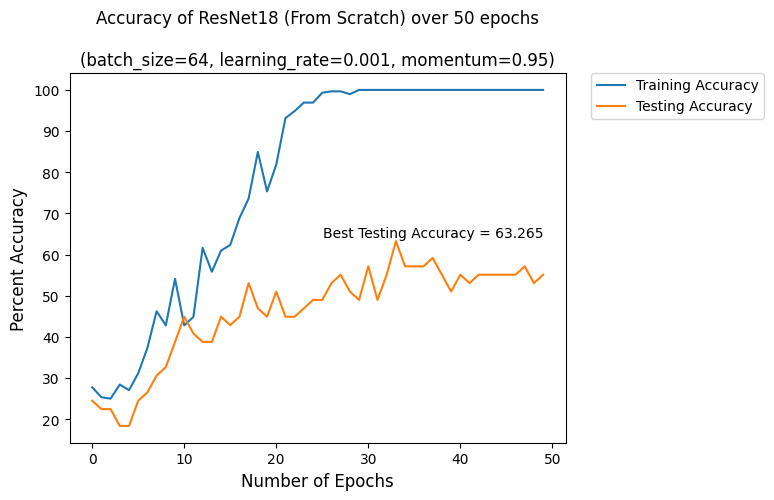

In [97]:
plot_param = "Accuracy"
# plot_param = "Loss"
model_type = "ResNet18"

epochs = [i for i in range(num_epochs)]

# with open(fname, 'rb') as f: 
#     output = pk.load(f)

hyperparams = f"(batch_size={batch_size}, learning_rate={lr}, momentum={momentum})"

plt.figure()

plt.title(f"Accuracy of {model_type} (From Scratch) over 50 epochs\n\n" + hyperparams)
plt.plot(epochs, output["train_accs"], label = "Training Accuracy")
plt.plot(epochs, output["test_accs"], label = "Testing Accuracy")

# plt.title(f"Loss of {model_type} (From Scratch) over 50 epochs\n\n" + hyperparams)
# plt.plot(epochs, output["train_losses"], label = "Training Loss")
# plt.plot(epochs, output["test_losses"], label = "Testing Loss")

plt.ylabel("Percent Accuracy", size=12)
plt.xlabel("Number of Epochs", size=12)
plt.legend(bbox_to_anchor=(1.4, 1), loc='upper right', borderaxespad=0)
final_dp = max(output["test_accs"])
plt.text(epochs[-1], final_dp+1, f"Best Testing {plot_param} = {final_dp:.3f}",horizontalalignment='right')
plt.show()

In [99]:
height = [92, 96, 99, 159]
x = [i for i in range(len(height))]

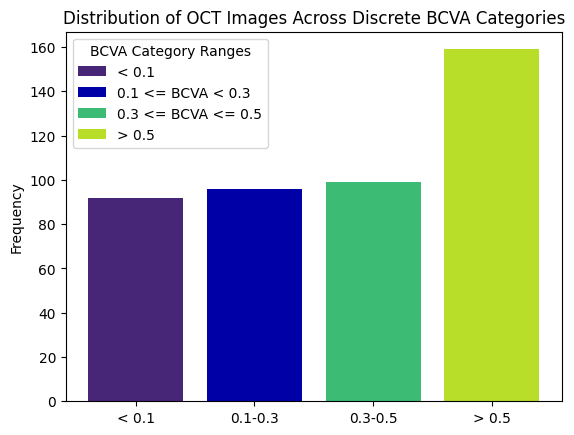

In [16]:
fig, ax = plt.subplots()

bar_labels = ['< 0.1', '0.1 <= BCVA < 0.3', '0.3 <= BCVA <= 0.5', '> 0.5']
# $< 0.1$ (92 samples); (2) $0.1 \le$ BCVA $< 0.3$ (96 samples); (3) $0.3 \leq$ BCVA $\leq 0.5$ (99 samples); (4) BCVA $> 0.5$
counts = [92, 96, 99, 159]
labels = ['< 0.1', '0.1-0.3', '0.3-0.5', '> 0.5']
bar_colors = ['#482677ff', '#0000a7', '#3cbb75ff', '#b8de29ff'] # viridis color palette

ax.bar(labels, counts, label=bar_labels, color=bar_colors)

ax.set_ylabel('Frequency')
ax.set_title('Distribution of OCT Images Across Discrete BCVA Categories')
ax.legend(title='BCVA Category Ranges')

plt.show()